# Support vector machine model using title data vectorized with TF-IDF

In [1]:
#import packages

import numpy as np

import pandas as pd 

from sklearn.model_selection import KFold, cross_validate

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer, classification_report

import matplotlib as plt

from time import process_time

In [2]:
#import data

%store -r x_title_train_tf
%store -r x_title_test_tf
%store -r y_title_train_tf
%store -r y_title_test_tf


In [3]:
#rename variables for ease of use

x_train =  x_title_train_tf
x_test =  x_title_test_tf
y_train = y_title_train_tf
y_test = y_title_test_tf

In [4]:
#define model

svm = SVC()

In [5]:
#define scoring metrics for cross validation

scorer = {'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),
          'recall': make_scorer(recall_score),
          'f1_score' : make_scorer(f1_score)
          }

In [6]:
#define KFold

k_folds = KFold(n_splits = 5, random_state=42, shuffle=True)

In [7]:
#cross validate on training set to check model stability

cv_scores_tfidf_title_svm = cross_validate(svm, x_train, y_train, cv = k_folds, scoring=scorer)

In [8]:
#check cross validation scores

cv_scores_tfidf_title_svm

{'fit_time': array([123.88985944, 116.17337084, 117.30905509, 115.24787831,
        122.43947124]),
 'score_time': array([9.27319694, 9.3101387 , 9.14857125, 9.13856816, 9.27217722]),
 'test_accuracy': array([0.88777751, 0.89119297, 0.8853239 , 0.88483592, 0.89044772]),
 'test_precision': array([0.87675378, 0.88015608, 0.8707633 , 0.87234043, 0.87331314]),
 'test_recall': array([0.87100301, 0.87237569, 0.87028367, 0.87044094, 0.87863674]),
 'test_f1_score': array([0.87386893, 0.87624861, 0.87052342, 0.87138965, 0.87596685])}

In [9]:
#fit model on the whole training set
start = process_time()

svm.fit(x_train, y_train)

end=process_time()

In [10]:
#test model on test set

y_pred = svm.predict(x_test)

In [11]:
#view classification report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      9794
           1       0.88      0.88      0.88      7773

    accuracy                           0.89     17567
   macro avg       0.89      0.89      0.89     17567
weighted avg       0.89      0.89      0.89     17567



In [12]:
#view confusion matrix

conf_matrix=confusion_matrix(y_test, y_pred)


[Text(0.5, 1.0, 'SVM model with Title Data (TF-IDF)'),
 Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual')]

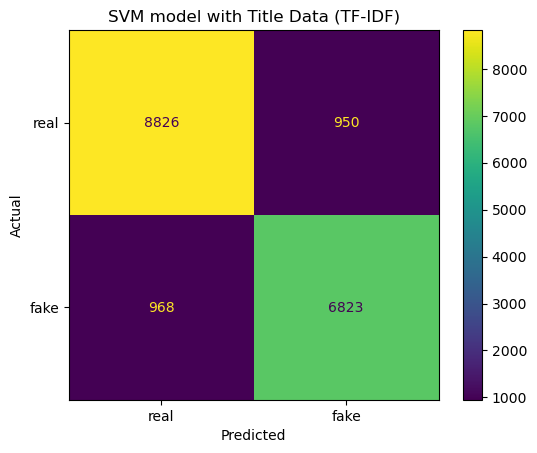

In [13]:
cm_plot = ConfusionMatrixDisplay(conf_matrix, display_labels = ['real', 'fake'])
cm_plot.plot(values_format='')
cm_plot.ax_.set(
                title='SVM model with Title Data (TF-IDF)', 
                xlabel='Predicted', 
                ylabel='Actual')

In [14]:
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
fit_time=end-start

In [15]:
dict = {'data type': 'title',
        'model type':'SVM',
        'vectorize type':'TF-IDF',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'fit time': fit_time
       }

In [16]:
tfidf_title_SVM=pd.DataFrame.from_dict([dict])

In [17]:
tfidf_title_SVM

,data type,model type,vectorize type,accuracy,precision,recall,f1,fit time
0,title,SVM,TF-IDF,0.890818,0.877782,0.875754,0.876767,162.65625


In [18]:
#save results for later use

%store tfidf_title_SVM

Stored 'tfidf_title_SVM' (DataFrame)
